In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1'

In [ ]:
PH_data_three = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_three = data['PH'] == 3
    PH_data_three = PH_data_three.append(data[PH_three])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_three.to_pickle('PH_data_three.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_three.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_three.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
511,676,676200405111519,2004,5,11,15,26,49,119.983559,-11.765368,...,34.179775,53.711075,0.0,0,132.0,35.94701,1,131456,0,10100
512,676,676200405111519,2004,5,11,15,26,50,119.983559,-12.501856,...,34.179775,53.711075,0.0,0,132.0,35.94701,1,131456,0,10090
513,676,676200405111519,2004,5,11,15,26,51,119.983559,-12.951931,...,39.062599,48.828247,0.0,0,132.0,35.94701,1,131456,0,10052
514,676,676200405111519,2004,5,11,15,26,52,119.983559,-13.013306,...,39.062599,53.711075,0.0,0,132.0,35.94701,1,131456,0,10010
515,676,676200405111519,2004,5,11,15,26,53,119.983559,-13.299717,...,34.179775,53.711075,0.0,0,132.0,35.94701,1,131456,0,9972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,676,676201003140736,2002,3,14,7,44,43,119.983559,-2.395603,...,34.179775,58.593899,0.0,0,133.0,5.97652,1,32848,0,11810
554,676,676201003140736,2002,3,14,7,44,44,119.983559,-2.641102,...,34.179775,58.593899,0.0,0,133.0,5.97652,1,32848,0,11794
555,676,676201003140736,2002,3,14,7,44,45,119.983559,-3.582169,...,34.179775,58.593899,0.0,0,133.0,5.97652,1,32844,0,11790
556,676,676201003140736,2002,3,14,7,44,46,119.983559,-3.704914,...,34.179775,58.593899,0.0,0,133.0,5.97652,1,32844,0,11766


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_three_rf_gen_three.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['WD_Mean' 'CWPF_Max' 'CWPF_Min' 'HF2' 'CWPF_Mean' 'HYDG' 'TAT' 'TMODE'
 'TAI' 'EVNT' 'VHF1' 'TCAS' 'TOCW_Mean' 'BAL2_Max' 'VIB_1_Min' 'WD_Max'
 'BAL2_Mean' 'TMAG' 'OIT_2' 'TOCW_Min' 'FGC3' 'CCPF_Min' 'NSQT_Max'
 'BAL2_Min' 'POVT' 'Year' 'AOA1_Min' 'CCPF_Max' 'AOA1_Mean' 'SPLY' 'SAT'
 'NSQT_Min' 'CWPC_Min' 'VIB_1_Max' 'TRKM_Min' 'GLS' 'AOA1_Max' 'MACH_Max'
 'OIT_3' 'PT_Mean' 'TAS_Mean' 'PUSH' 'PI_Min' 'ALT_Min' 'ELEV_1' 'SPL_1'
 'TRKM_Max' 'TAS_Max' 'FADS' 'MH_Min' 'ELEV_2' 'TRKM_Mean' 'N1T_Min'
 'SMKB' 'LONP' 'MH_Max' 'N1T_Max' 'PSA_Mean' 'CASM_Mean' 'WD_Min' 'MW'
 'ALTR_Mean' 'APUF_Min' 'RALT_Mean' 'ALT_Max' 'FLAP' 'ALT_Mean' 'OIT_4'
 'SPL_2' 'LONG_Mean' 'VIB_1_Mean' 'CWPC_Max' 'MH_Mean' 'LMOD' 'N1T_Mean'
 'CCPF_Mean' 'ABRK' 'LONG_Max' 'ALTR_Min' 'Second' 'PT_Min' 'TOCW_Max'
 'CASM_Max' 'ILSF' 'N1CO' 'LATP' 'AOAI_Mean' 'MSQT_1_Min' 'FIRE_2'
 'FQTY_3' 'PS_Max' 'Day' 'HF1' 'AOAI_Max' 'DA_Min' 'CASM_Min' 'ALTR_Max'
 'LOC' 'LONG_Min' 'PSA_Min' 'CAS_Min' 'Month' 'Hour' 'WAI_2' 'SMOK'
 'AO

In [ ]:
print(np.argsort(rfr.feature_importances_))

[182  82  81  26  80  27  57  60  56   9  61  58 110 136 180 184 134  59
  40 111  12  75 166 135  45   0 120  76 119  53  48 165  78 181 177  22
 121 157  41  98 167  47  90 114   7  54 178 169  11 159   8 176 162  49
  33 160 163  95 140 183  36 116  69 188 115  17 113  42  55 152 179  79
 158  31 161  74   6 154 117   5  99 112 142  29  37  30 128  84  14  20
  94   2  25 130 144 141 118  32 153  96 138   1   3  67  50 125  83 187
 126 155 147 148 129  52 146  89  16 185   4 145  92 143  65  63 168 109
  51 171 102  93  38 186  21 123 156 107 103  23 101 105 170  24  97  62
 174  91  86 100  66 127 106  68  70 172  10  71  35  87  64 108  85  43
 173 124  15 104  88  72  13 131  73 175 151 132 137 133  39 139  28  34
 164  44  46  19  77 122 150 149  18]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 133.26359288299398


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9985618461639582


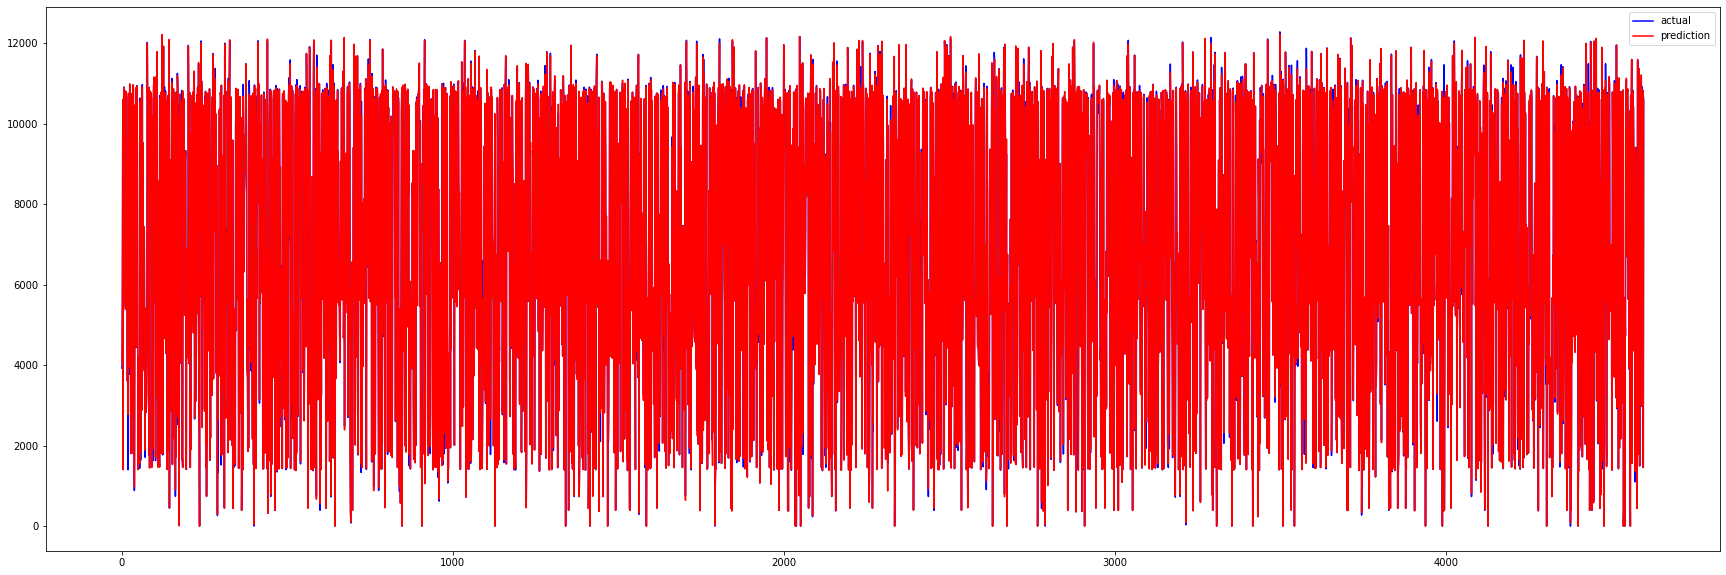

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_three_rf_gen_three.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'ALT_Mean' 'ALT_Min' 'ALT_Max' 'ALTR_Mean' 'ALTR_Min' 'ALTR_Max'
 'AOA1_Mean' 'AOA1_Min' 'AOAC_Mean' 'AOAC_Min' 'AOAI_Mean' 'AOAI_Min'
 'AOAI_Max' 'BAL1_Mean' 'BAL1_Min' 'BAL2_Mean' 'BAL2_Min' 'TOCW_Max'
 'TOCW_Min' 'TOCW_Mean' 'SHKR_Max' 'PI_Min' 'PI_Max' 'PS_Mean' 'PS_Min'
 'WS_Max' 'PSA_Mean' 'PSA_Min' 'PSA_Max' 'BAL2_Max' 'PT_Mean' 'PT_Max'
 'RUDD_Mean' 'RUDD_Min' 'RUDD_Max' 'RUDP_Mean' 'RUDP_Min' 'RUDP_Max'
 'SHKR_Mean' 'PT_Min' 'CAS_Min' 'CASM_Mean' 'CASM_Min' 'TAS_Mean'
 'TAS_Min' 'TAS_Max' 'TH_Mean' 'TH_Min' 'TH_Max' 'TRK_Mean' 'TRK_Min'
 'NSQT_Max' 'TRKM_Mean' 'TRKM_Max' 'VIB_1_Min' 'VIB_1_Max' 'WD_Mean'
 'WD_Min' 'WD_Max' 'WS_Mean' 'WS_Min' 'TRKM_Min' 'PI_Mean' 'NSQT_Min'
 'N1T_Max' 'CASM_Max' 'DA_Mean' 'DA_Min' 'DA_Max' 'GS_Mean' 'GS_Min'
 'GS_Max' 'LONG_Mean' 'NSQT_Mean' 'LONG_Min' 'MACH_Mean' 'MACH_Min'
 'MACH_Max' 'MH_Mean' 'MH_Min' 'MH_Max' 'N1T_Mean' 'N1T_Min' 'LONG_Max'
 'MSQT_2_Min' 'PS_Max' 'MSQT_1_Max' 'LATP' 'LMOD' 'LOC' 'LONP' 'MNS' 'MRK'
 'MW' 'N1CO' 'OIT

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 113 114 115 116 117 118 119 120 125 126 128 129 130 131 132 134 135
 112 111 110 109  90  91  92  93 187  95  96  97 136  98 100 101 102 103
 104 105 106 107  99 138 140 141 167 168 169 170 171 172 173 174 166 176
 178 180 181 182 183 184 185 186 177  89 165 163 142 143 144 145 146 147
 148 152 164 153 155 156 157 158 159 160 161 162 154  87  94  85  30  31
  32  33  34  35  36  37  40  41  42  43  86  44  45  46  47  29  27  26
  22   2   3   4   5   6   7   8   9  48  10  12  13  14  16  17  18  20
  21  11  49 188  51  63  65  50  67  68  69  70  71  73  74  75  78  80
  81  82  83  84  62  61  66  60  59  58  57  54  56  24  52   1 123 122
 133 151  38 179  72  64 127 108 175  23  15 137  25  39 139  88  76  55
  79 124  19  53 150 149  77  28 121]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 1419.7294799273789


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.8367724324615008


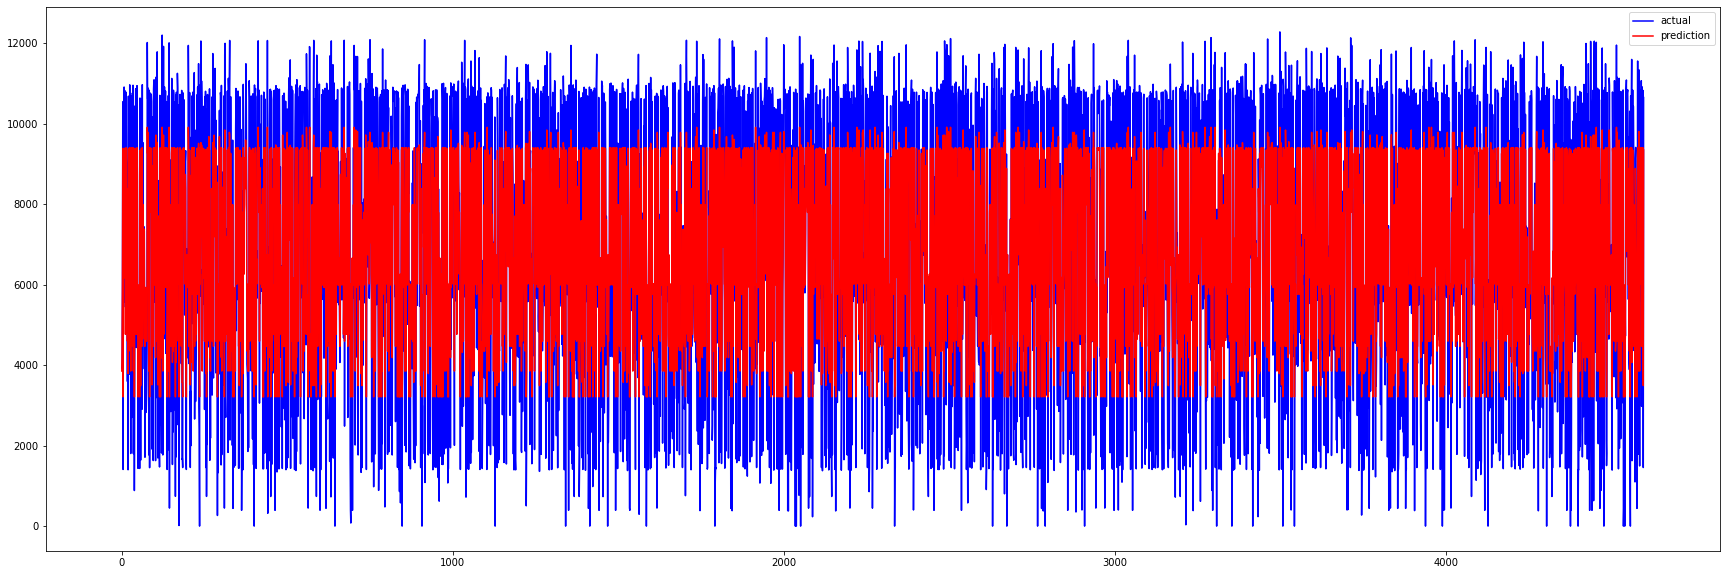

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_three_rf_gen_three.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 313.116516340096


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9920604797446402


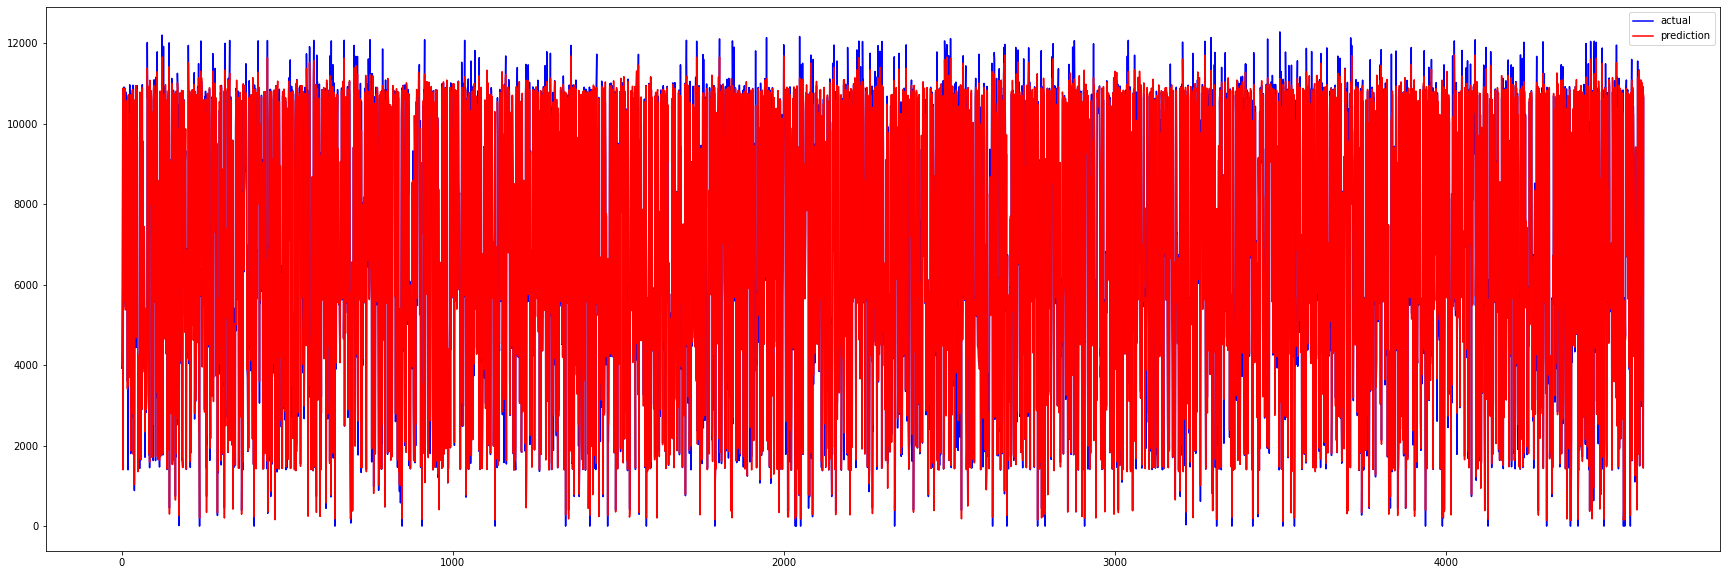

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(189,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
336/336 [==============================] - 2s 2ms/step - loss: 1415.6544 - mean_absolute_error: 1415.6544
Epoch 2/25
336/336 [==============================] - 1s 2ms/step - loss: 418.9211 - mean_absolute_error: 418.9211
Epoch 3/25
336/336 [==============================] - 1s 2ms/step - loss: 356.2752 - mean_absolute_error: 356.2752
Epoch 4/25
336/336 [==============================] - 1s 2ms/step - loss: 326.1009 - mean_absolute_error: 326.1009
Epoch 5/25
336/336 [==============================] - 1s 2ms/step - loss: 308.0210 - mean_absolute_error: 308.0210
Epoch 6/25
336/336 [==============================] - 1s 2ms/step - loss: 296.6635 - mean_absolute_error: 296.6635
Epoch 7/25
336/336 [==============================] - 1s 2ms/step - loss: 284.7033 - mean_absolute_error: 284.7033
Epoch 8/25
336/336 [==============================] - 1s 2ms/step - loss: 279.0316 - mean_absolute_error: 279.0316
Epoch 9/25
336/336 [==============================] - 1s 2ms/step - loss: 276.

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9933084749385451
MSE: 82481.78227354001
RMSE: 287.1964175847951
MAE: 189.26050045895147


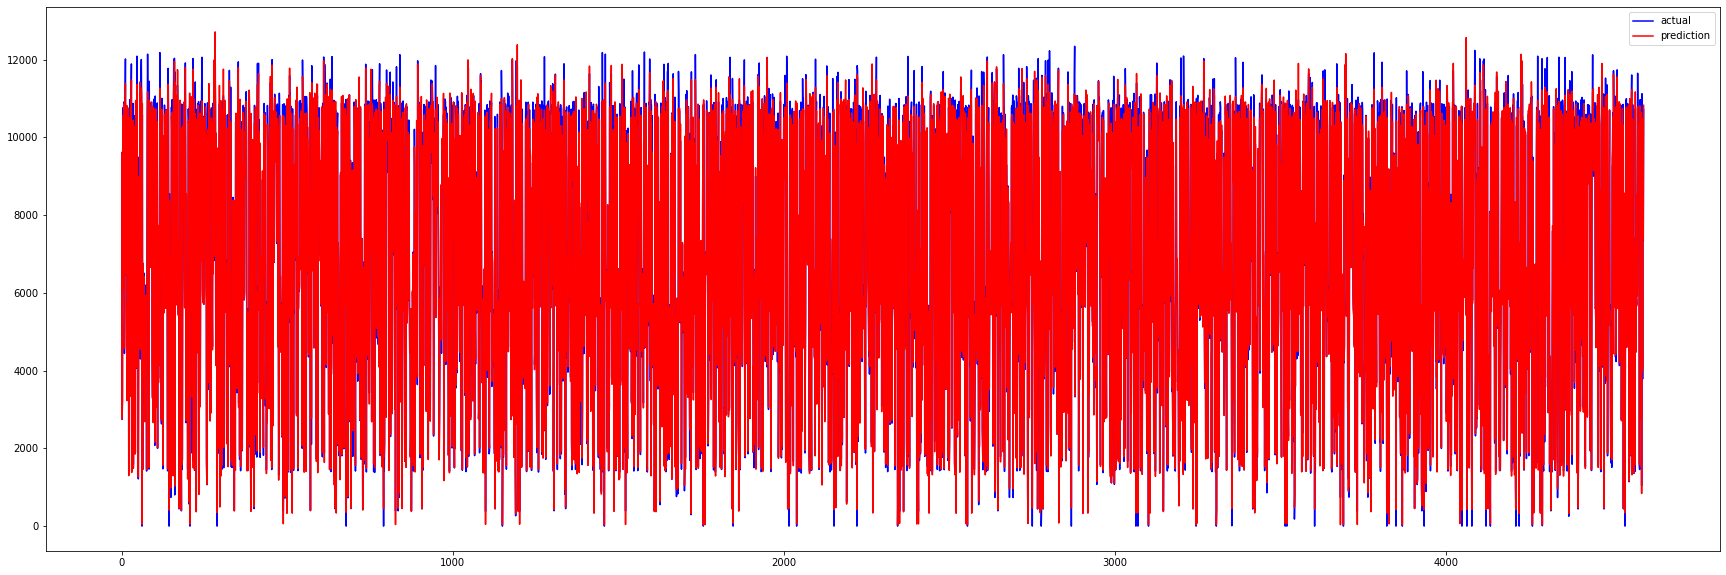

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(189,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 188, 32)           96        
                                                                 
 flatten_2 (Flatten)         (None, 6016)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                385088    
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 385,249
Trainable params: 385,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9932937298796615
MSE: 82663.5343741873
RMSE: 287.51266819774617
MAE: 195.69162806149902


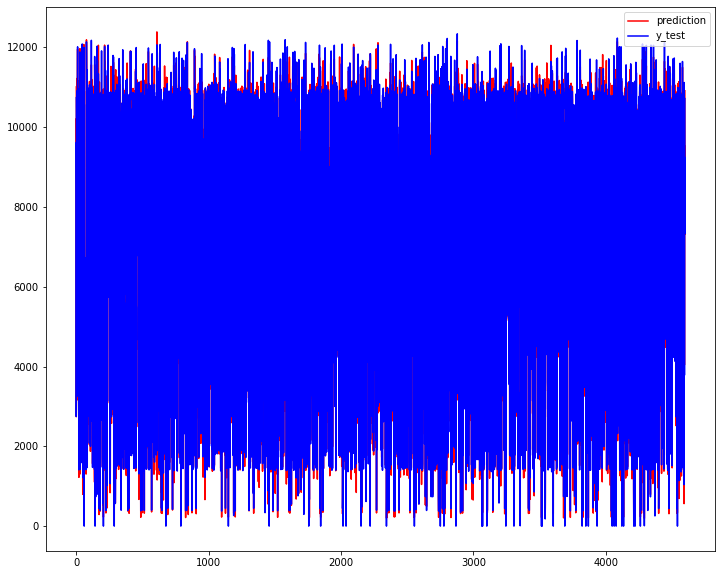

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()